In [1]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [2]:
df.skew()

fixed_acidity           0.982751
volatile_acidity        0.671593
citric_acid             0.318337
residual_sugar          4.540655
chlorides               5.680347
free_sulfur_dioxide     1.250567
total_sulfur_dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [3]:
df.shape

(1599, 12)

In [3]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [4]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

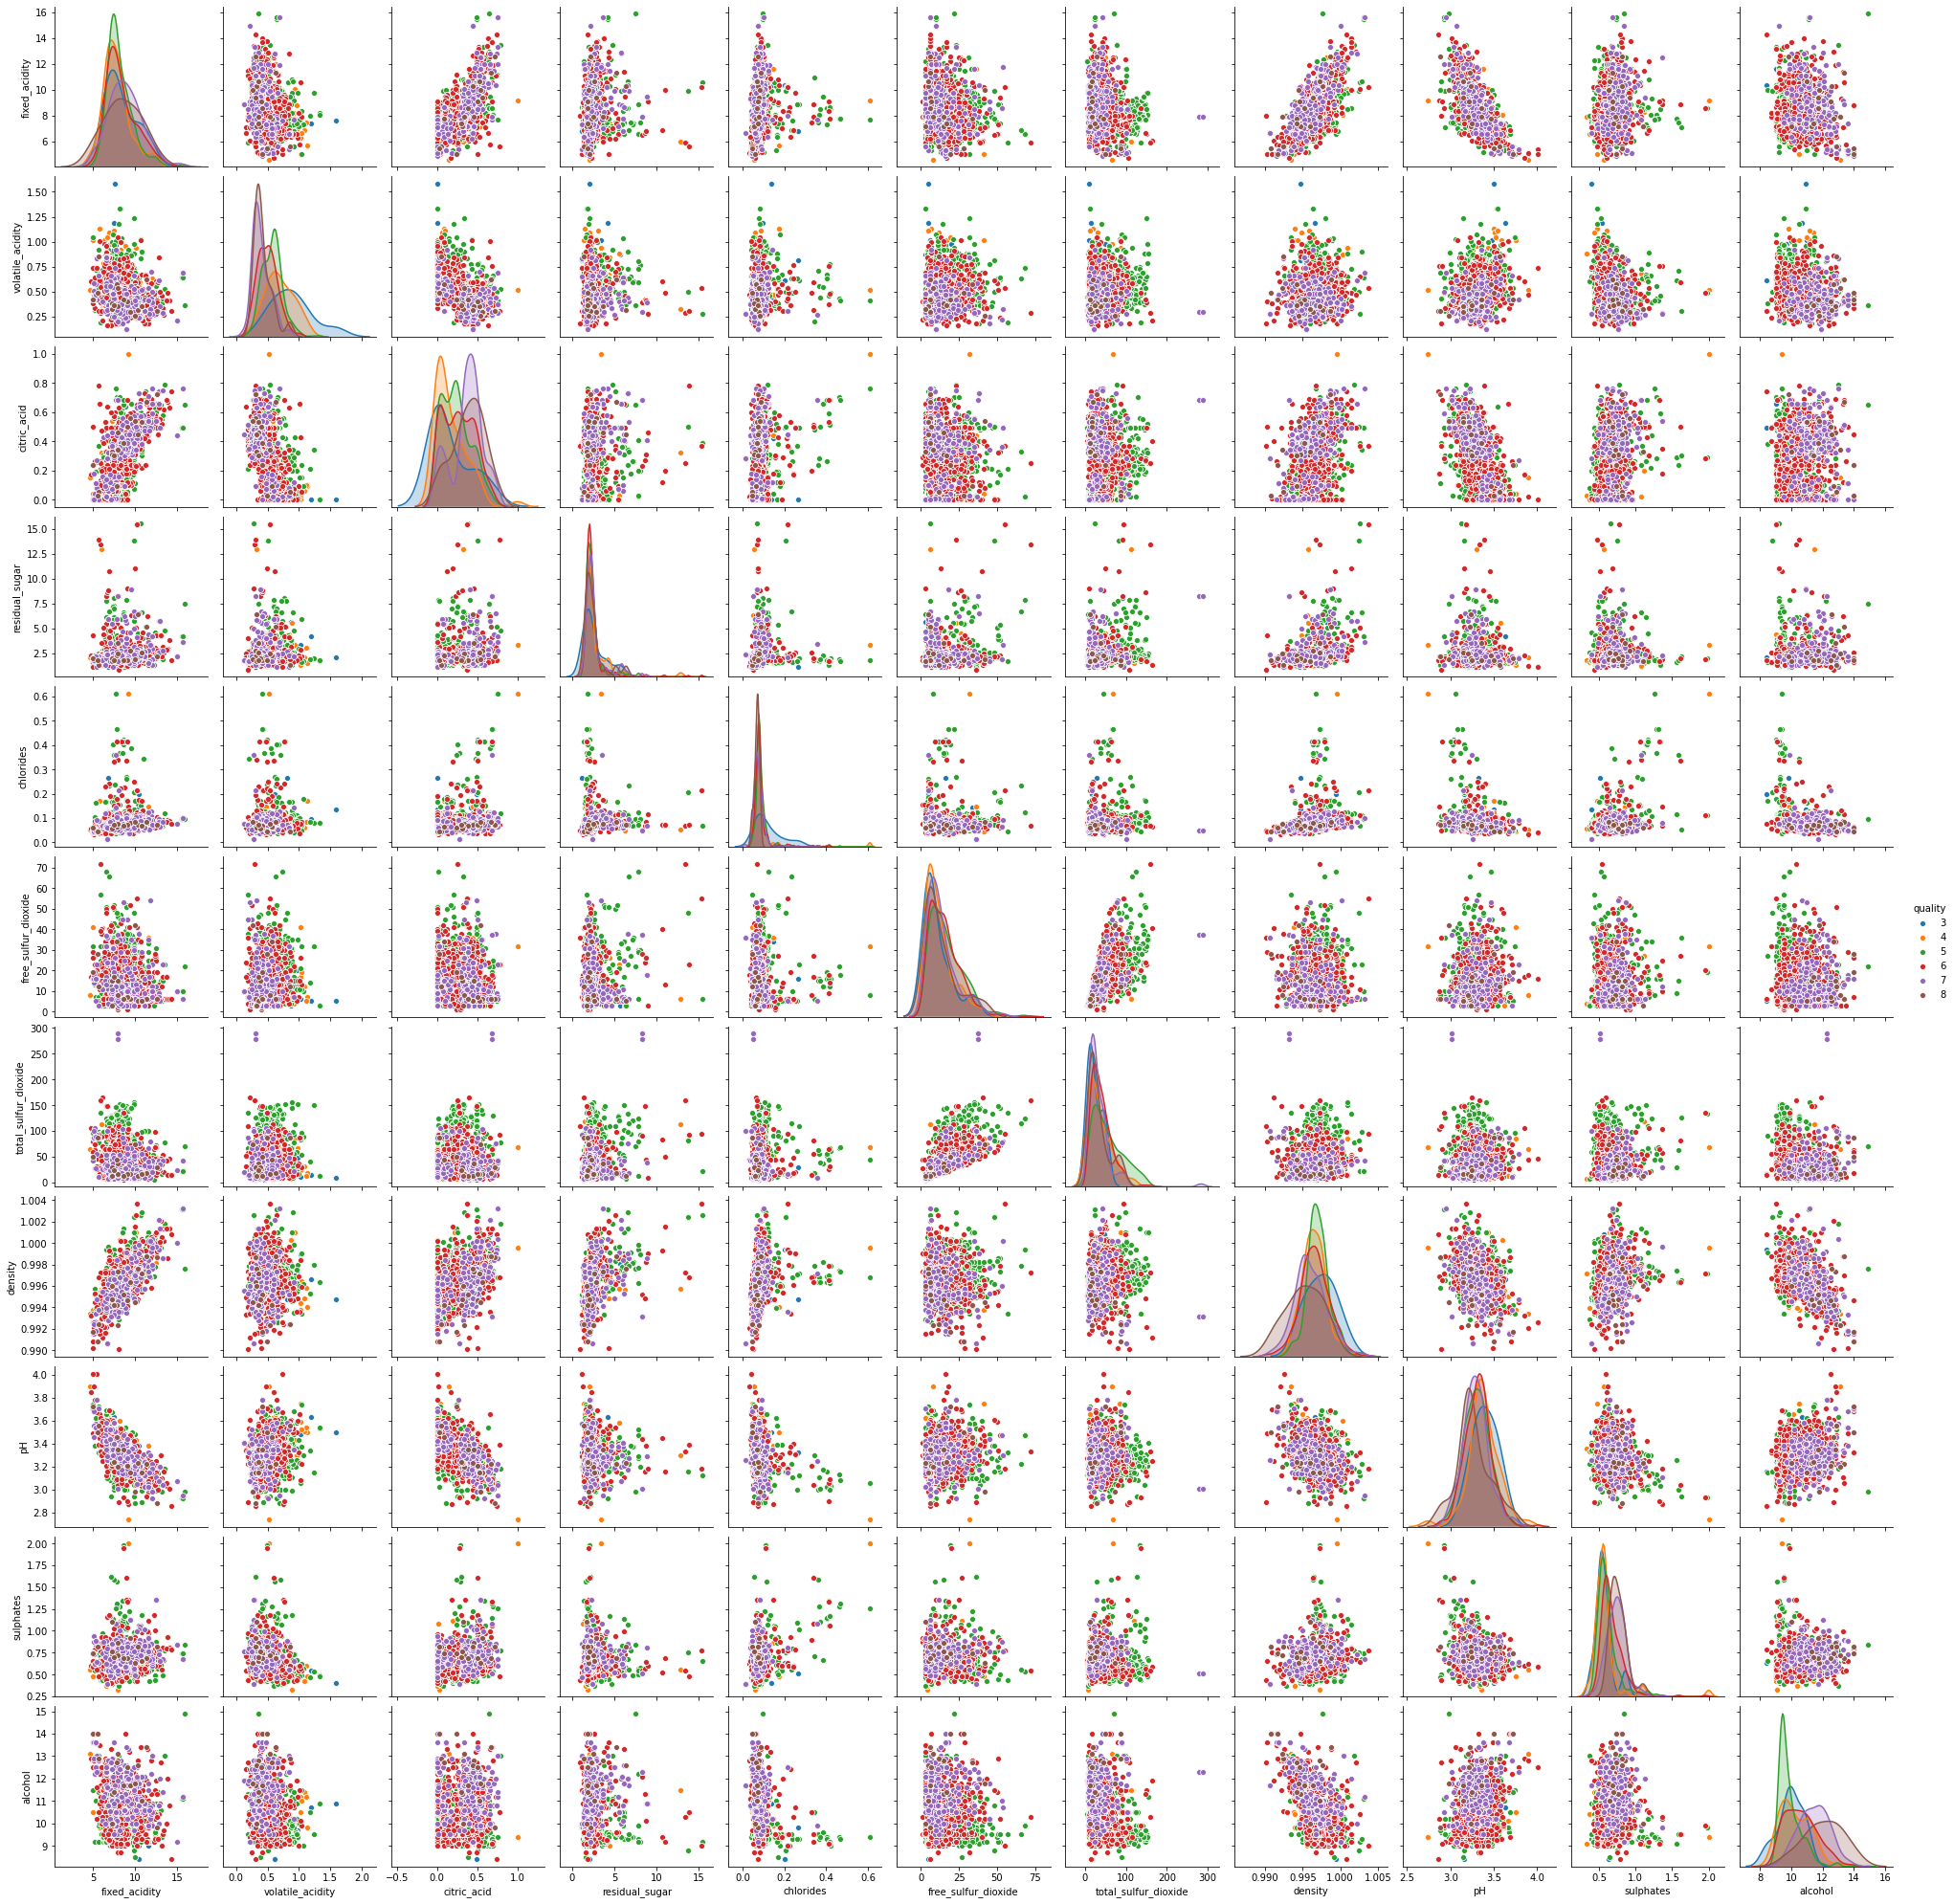

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='quality')

In [6]:
df = df.drop('quality',axis=1)
df.head()
features = df.columns

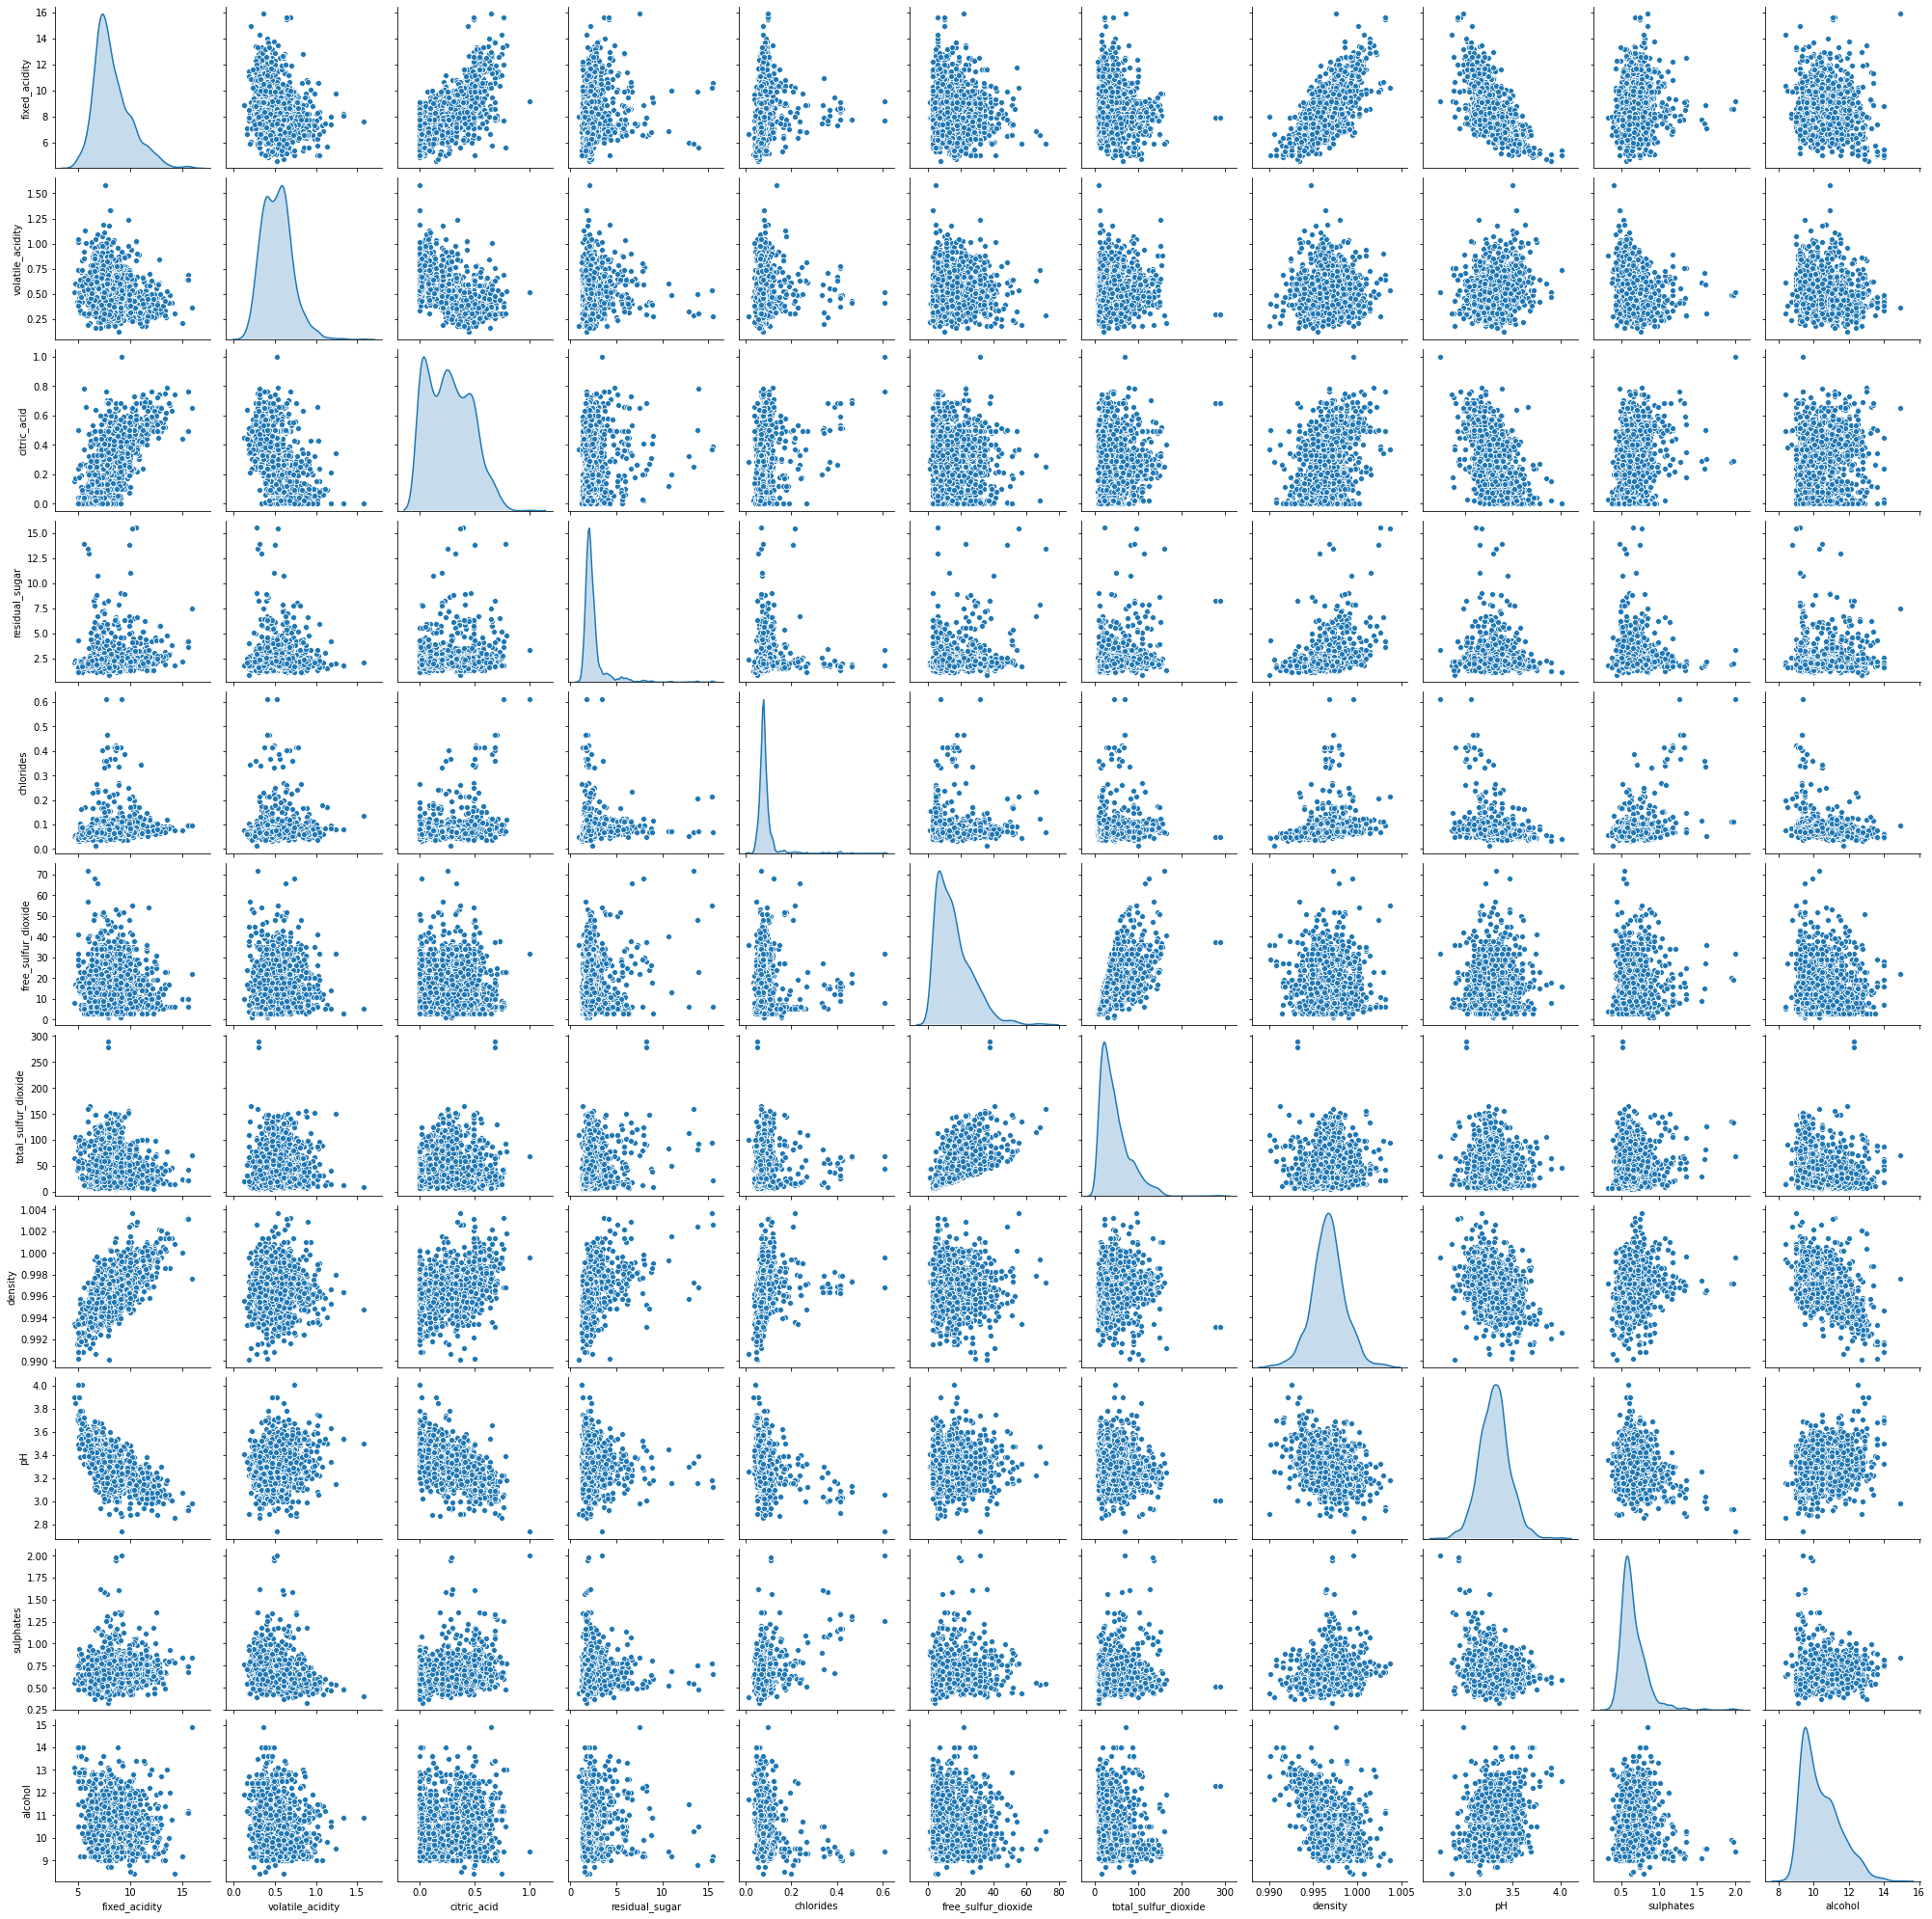

In [7]:
sns.pairplot(df,diag_kind='kde')

In [8]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df = pd.DataFrame(pt.fit_transform(df))
#df = pd.DataFrame(sc.fit_transform(df))
df.columns = features
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.442666          0.995542    -1.531109       -0.597145  -0.172896   
1      -0.161308          1.771299    -1.531109        0.556565   0.786204   
2      -0.161308          1.269801    -1.255359        0.152372   0.560696   
3       1.522582         -1.550050     1.398471       -0.597145  -0.226113   
4      -0.442666          0.995542    -1.531109       -0.597145  -0.172896   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.268045             -0.124411  0.564442  1.275690  -0.581650   
1             0.993852              0.854954  0.036966 -0.709517   0.395140   
2             0.193450              0.540394  0.142851 -0.310054   0.183772   
3             0.385115              0.693699  0.669354 -0.980154  -0.392318   
4            -0.268045             -0.124411  0.564442  1.275690  -0.581650   

    alcohol  
0 -1.075025  
1 -0.500860  
2 -0.500860  
3 -0.500860  
4 -1.075025

In [9]:
df.skew()

fixed_acidity           0.002529
volatile_acidity        0.003099
citric_acid             0.017788
residual_sugar         -0.015715
chlorides              -0.151304
free_sulfur_dioxide    -0.009948
total_sulfur_dioxide   -0.003752
density                -0.005049
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112373
dtype: float64

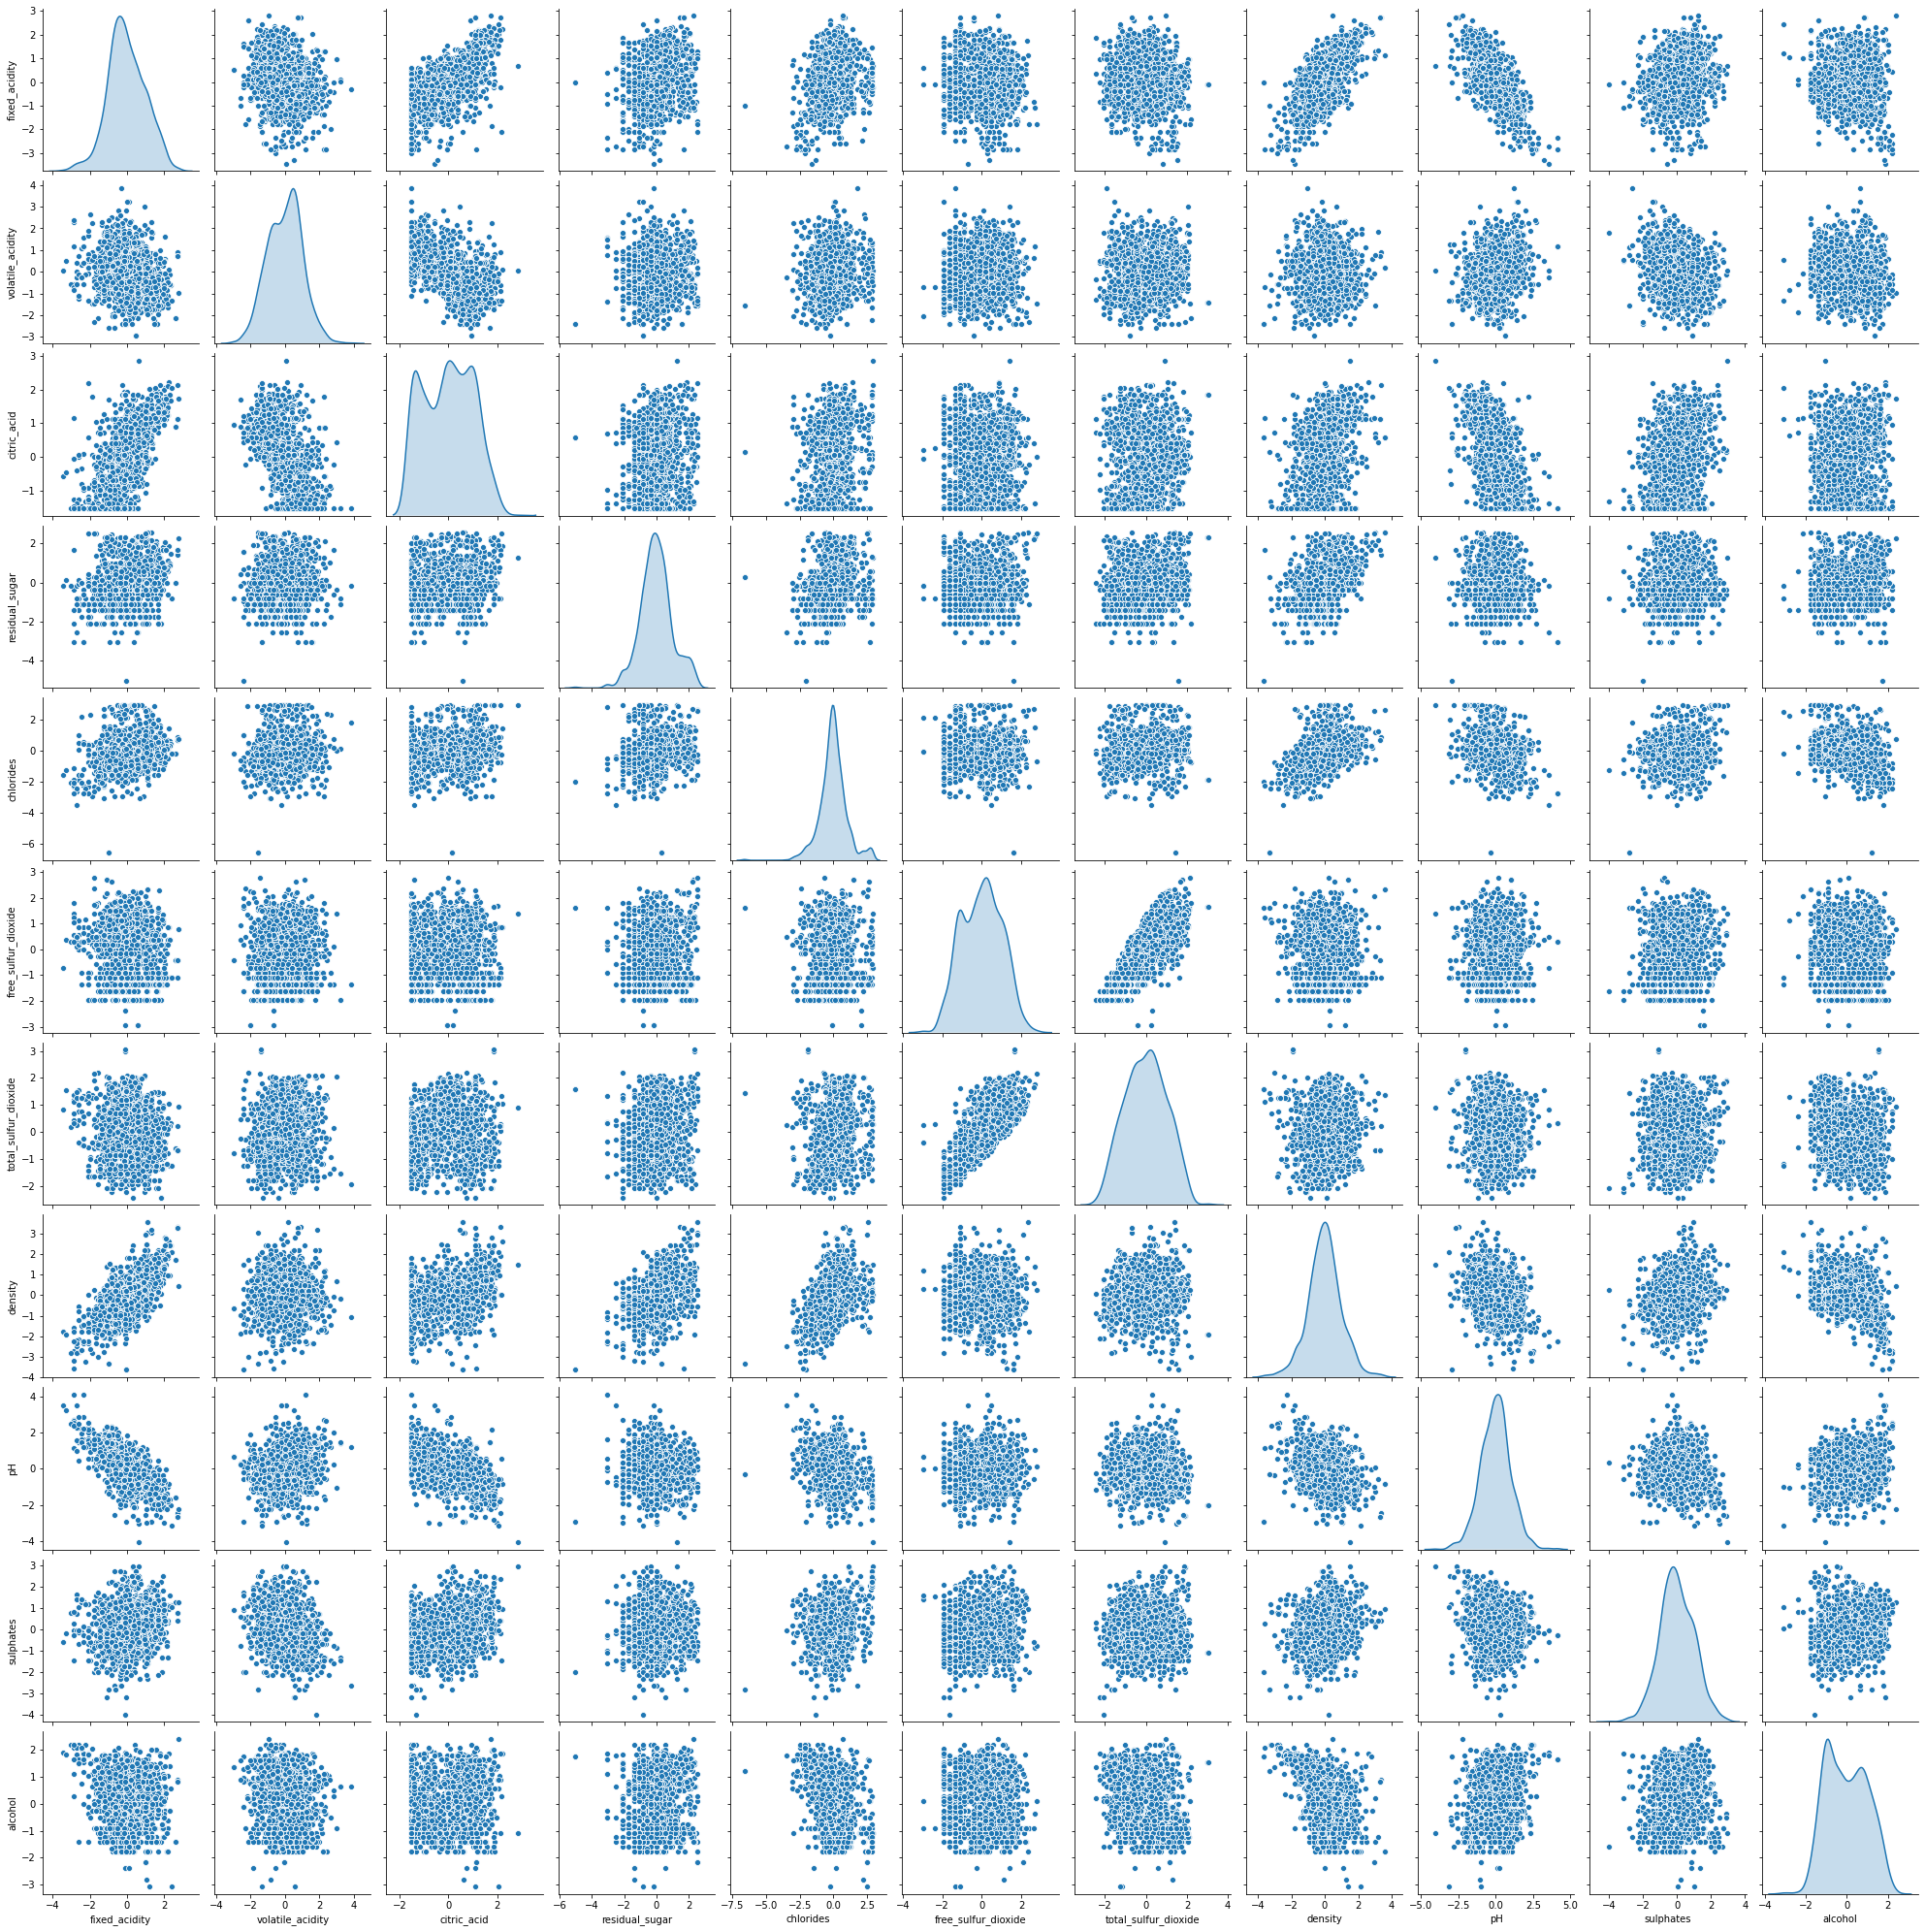

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(df,diag_kind='kde')

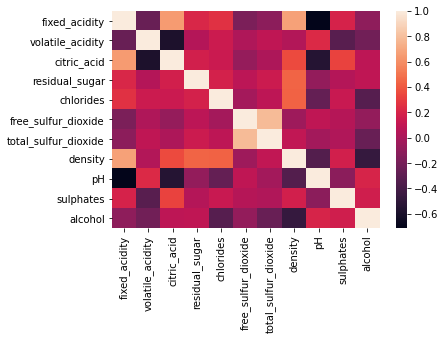

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(df.corr())

In [12]:
df_scaled = df

In [13]:
from sklearn.cluster import KMeans

cluster_range = range( 1, 20 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1    17589.000000
1              2    14242.536594
2              3    12520.976993
3              4    11355.654708
4              5    10551.983213
5              6    10031.851279
6              7     9586.263989
7              8     9182.762388
8              9     8832.645580
9             10     8581.221083
10            11     8368.959692
11            12     8155.970557
12            13     7968.896422
13            14     7754.475853
14            15     7581.493428

The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

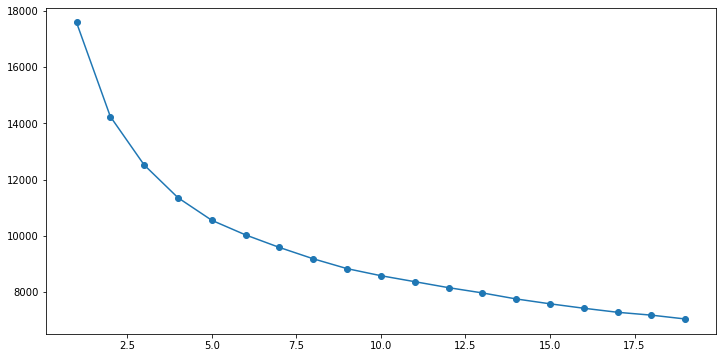

In [14]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [15]:
kmeans = KMeans(n_clusters=2, n_init = 15, random_state=2)

In [16]:
kmeans.fit(df_scaled)

KMeans(n_clusters=2, n_init=15, random_state=2)

In [17]:
centroids=kmeans.cluster_centers_

In [18]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [19]:
centroid_df

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       0.777489         -0.565522     0.850820        0.231285   0.234949   
1      -0.622517          0.452800    -0.681231       -0.185184  -0.188118   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.114484             -0.053219  0.480409 -0.600070   0.490432   
1             0.091665              0.042611 -0.384652  0.480461  -0.392677   

    alcohol  
0  0.098076  
1 -0.078527

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [20]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [21]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [23]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
finaldf = pd.concat([df0,df1])
finaldf.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
3        1.522582         -1.550050     1.398471       -0.597145  -0.226113   
9       -0.370000         -0.058175     0.539338        2.116898  -0.448846   
11      -0.370000         -0.058175     0.539338        2.116898  -0.448846   
13      -0.161308          0.550222     0.198089       -1.404288   1.283118   
14       0.501915          0.601873    -0.390937        1.480393   2.311592   

    free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
3              0.385115              0.693699  0.669354 -0.980154  -0.392318   
9              0.385115              1.475168  0.564442  0.275038   1.076325   
11             0.385115              1.475168  0.564442  0.275038   1.076325   
13            -0.555712             -0.349510  0.354035 -0.310054   2.687200   
14             2.218697              2.001058  0.982934 -0.980154   1.417914   

     alcohol labels  
3  -0.500860      0  
9   0.292864      0  
11  0.292864      0  
13 -1.579233      0  
14 -1.403358      0

In [24]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]

In [25]:
import numpy as np
I0=0
I1=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)

In [28]:
tot_I=I0+I1
print(tot_I)

14242.536593643386


In [29]:
kmeans.inertia_

14242.536593643383

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.18087346330265505


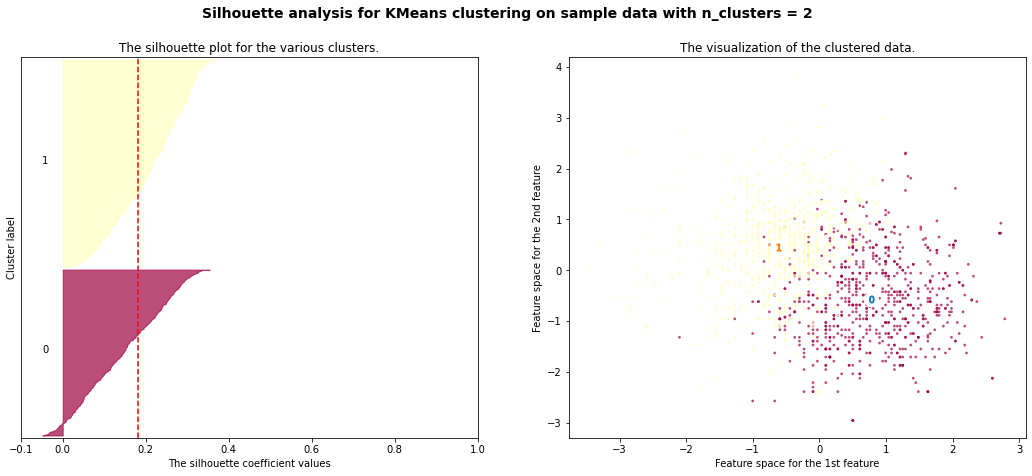

For n_clusters = 3 The average silhouette_score is : 0.1573280255010687


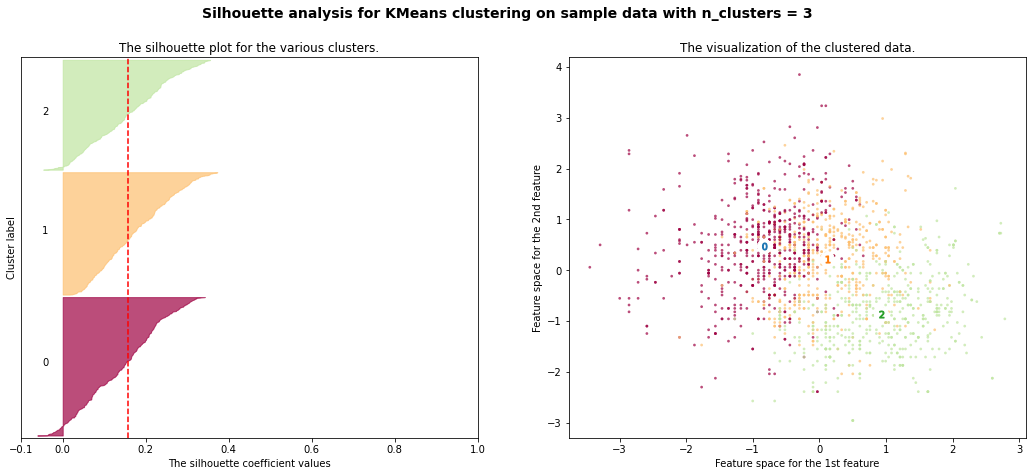

For n_clusters = 4 The average silhouette_score is : 0.1546854302429128


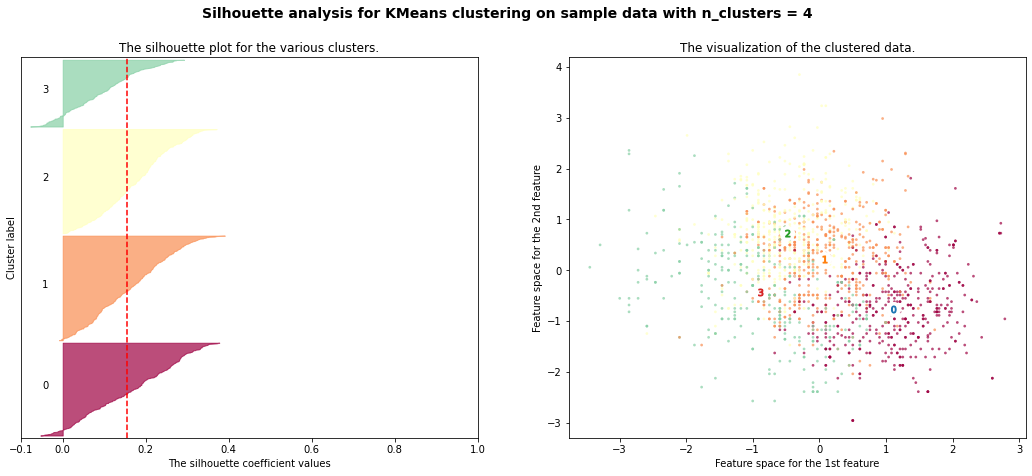

For n_clusters = 5 The average silhouette_score is : 0.1511247404534417


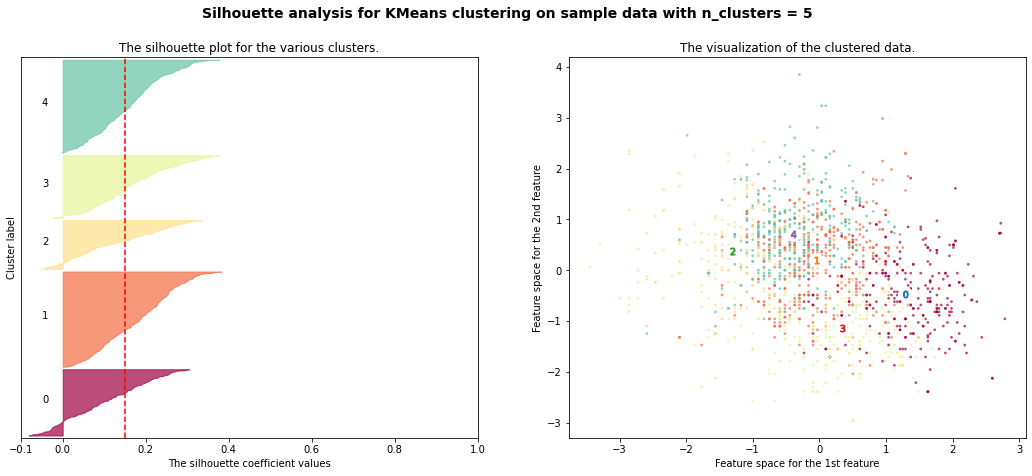

For n_clusters = 6 The average silhouette_score is : 0.1575169799432875


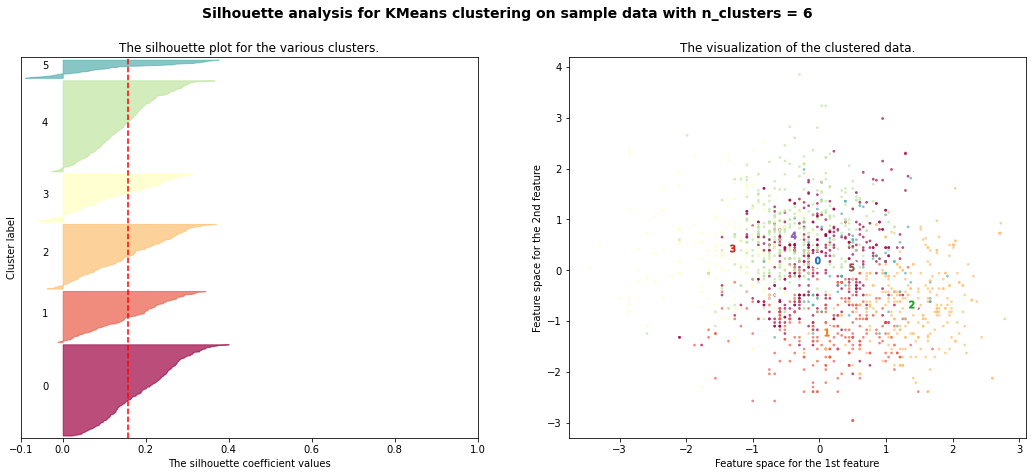

For n_clusters = 7 The average silhouette_score is : 0.14578607851751155


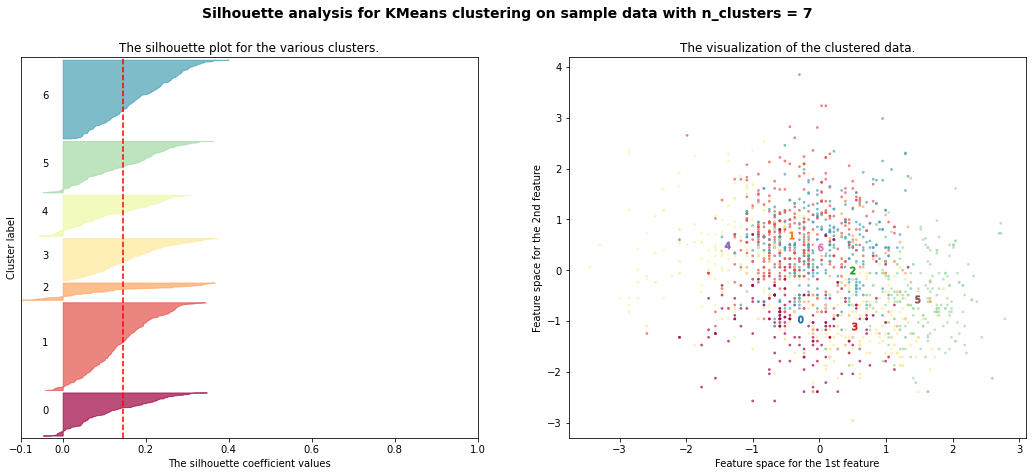

For n_clusters = 8 The average silhouette_score is : 0.13003438423745062


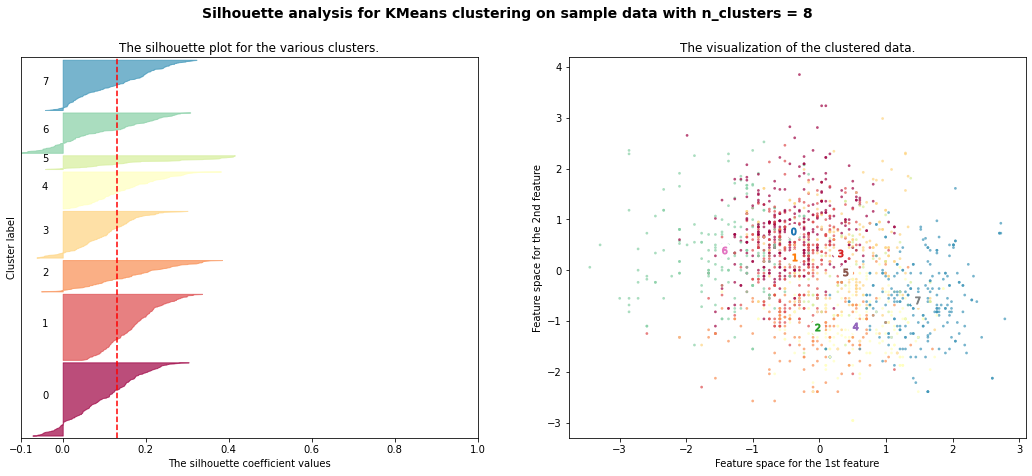

For n_clusters = 9 The average silhouette_score is : 0.12642513938377975


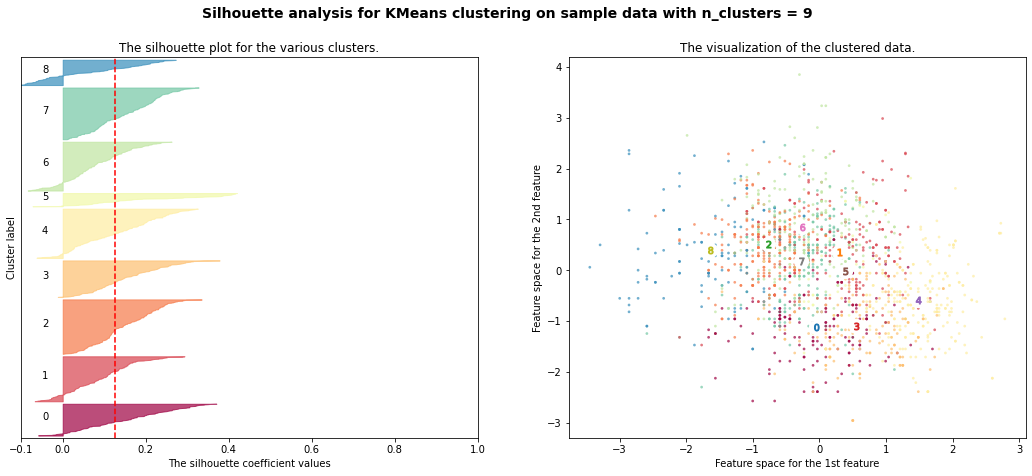

For n_clusters = 10 The average silhouette_score is : 0.125156292637159


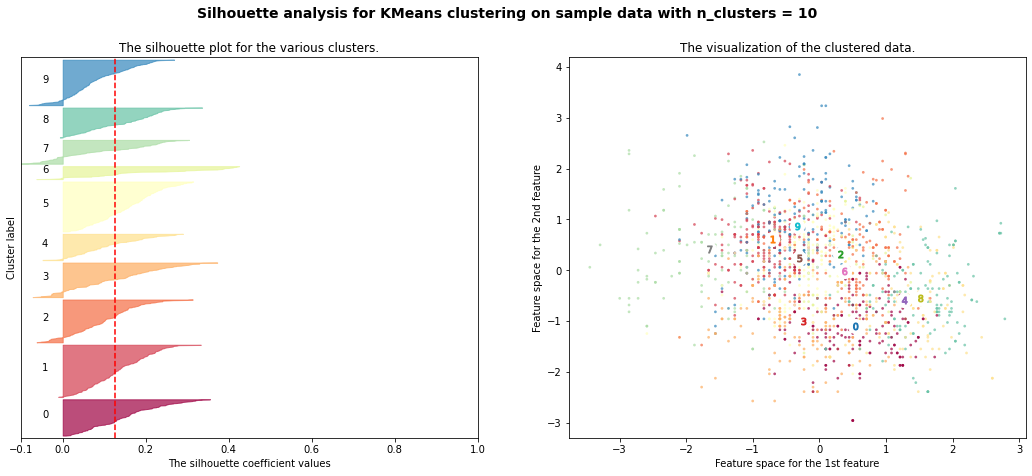

For n_clusters = 11 The average silhouette_score is : 0.12976247119131326


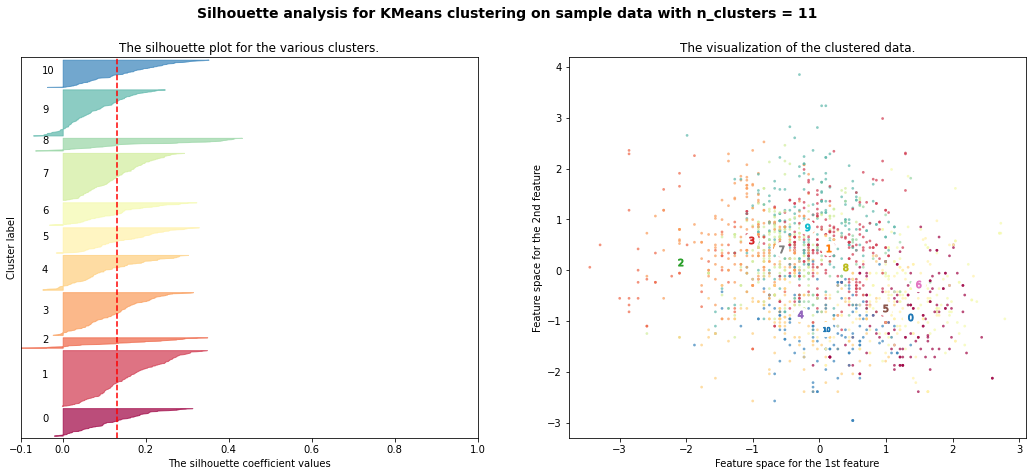

For n_clusters = 12 The average silhouette_score is : 0.12338657666886581


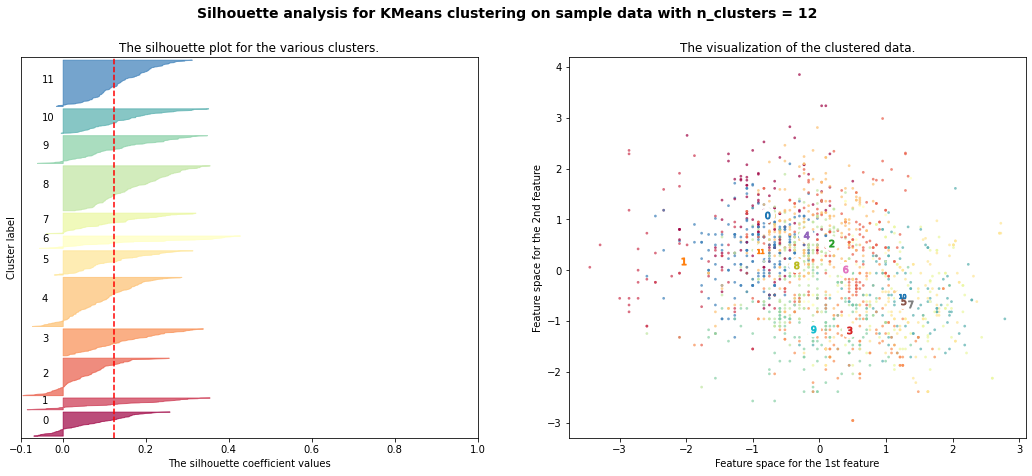

For n_clusters = 13 The average silhouette_score is : 0.12089048149353873


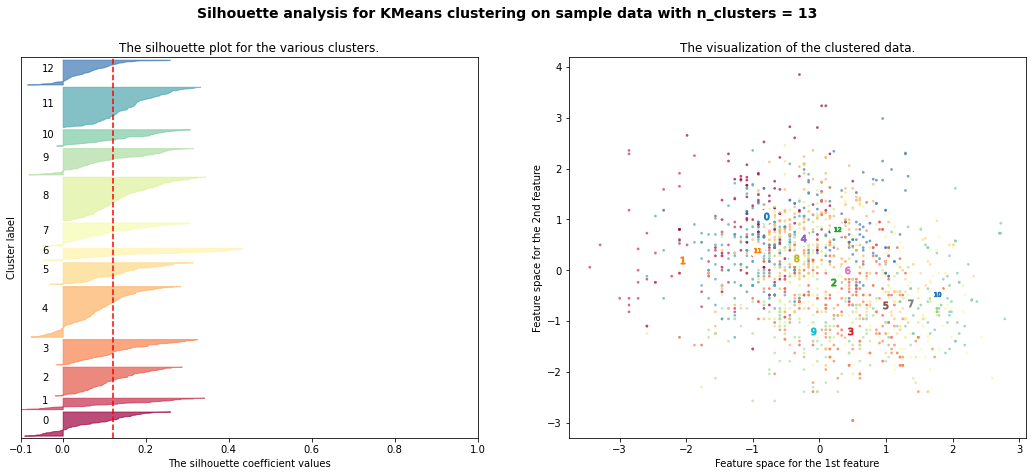

For n_clusters = 14 The average silhouette_score is : 0.12338236259900896


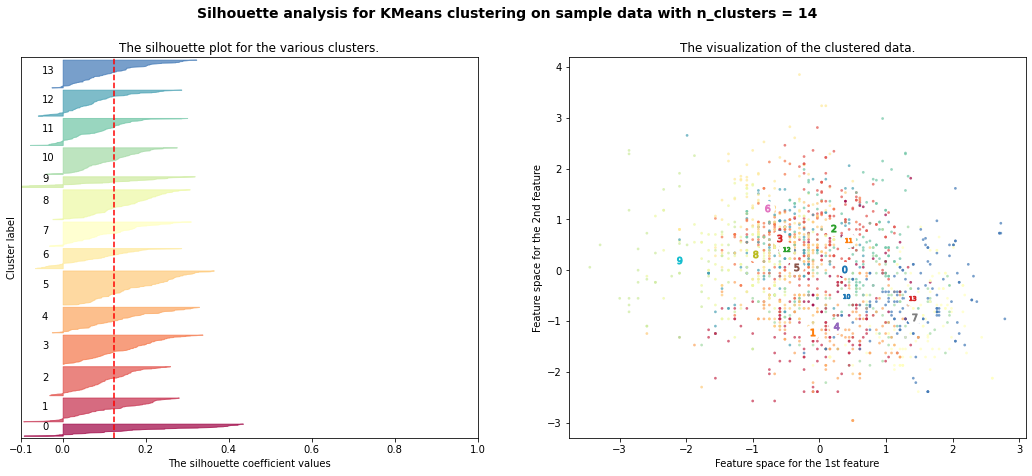

For n_clusters = 15 The average silhouette_score is : 0.12108157728334423


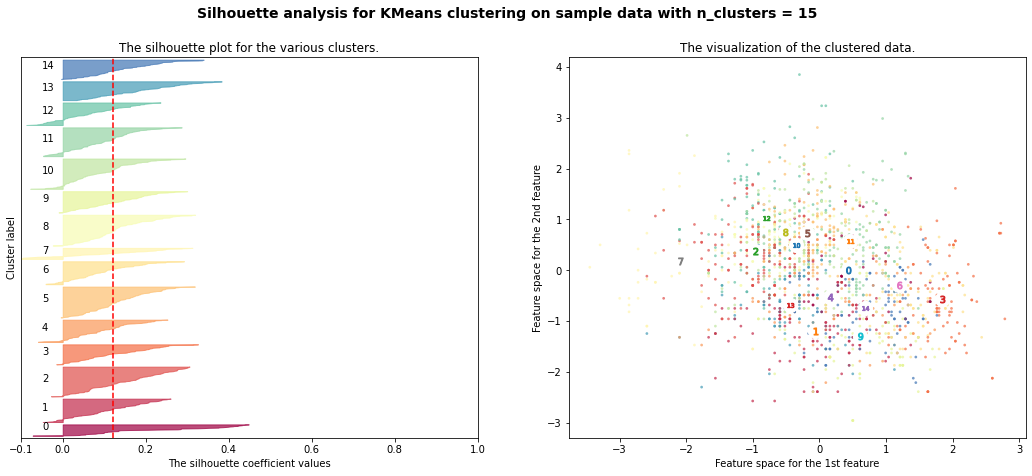

In [30]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

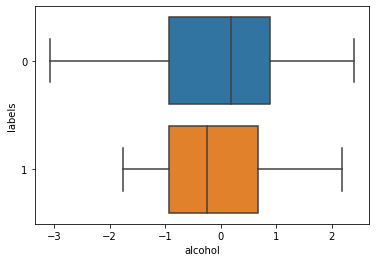

In [31]:
import seaborn as sns
sns.boxplot(x='alcohol', y = 'labels', data = finaldf)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EBBBE29988>,
      dtype=object)

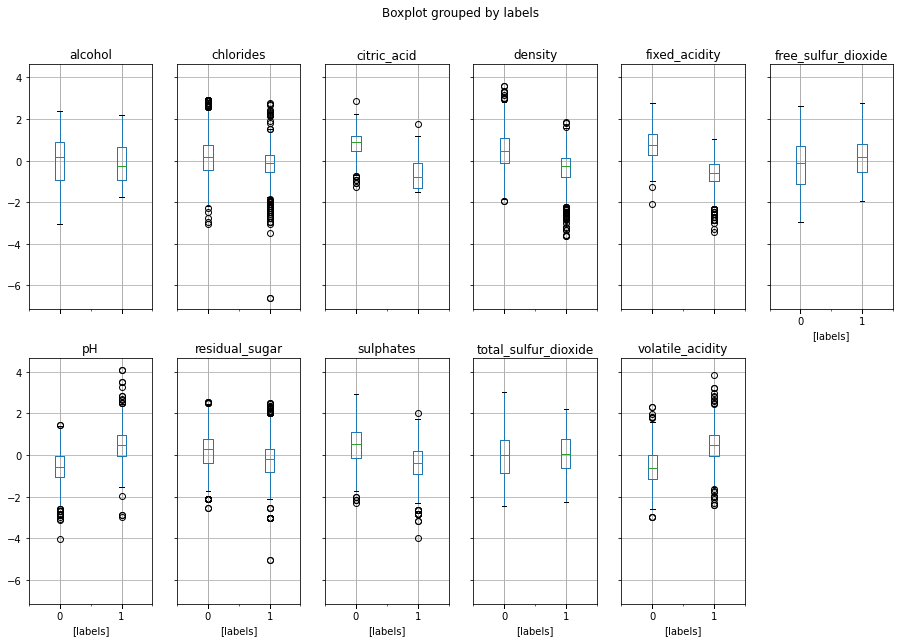

In [32]:
finaldf.boxplot(by = 'labels',  layout=(2,6), figsize=(15, 10))

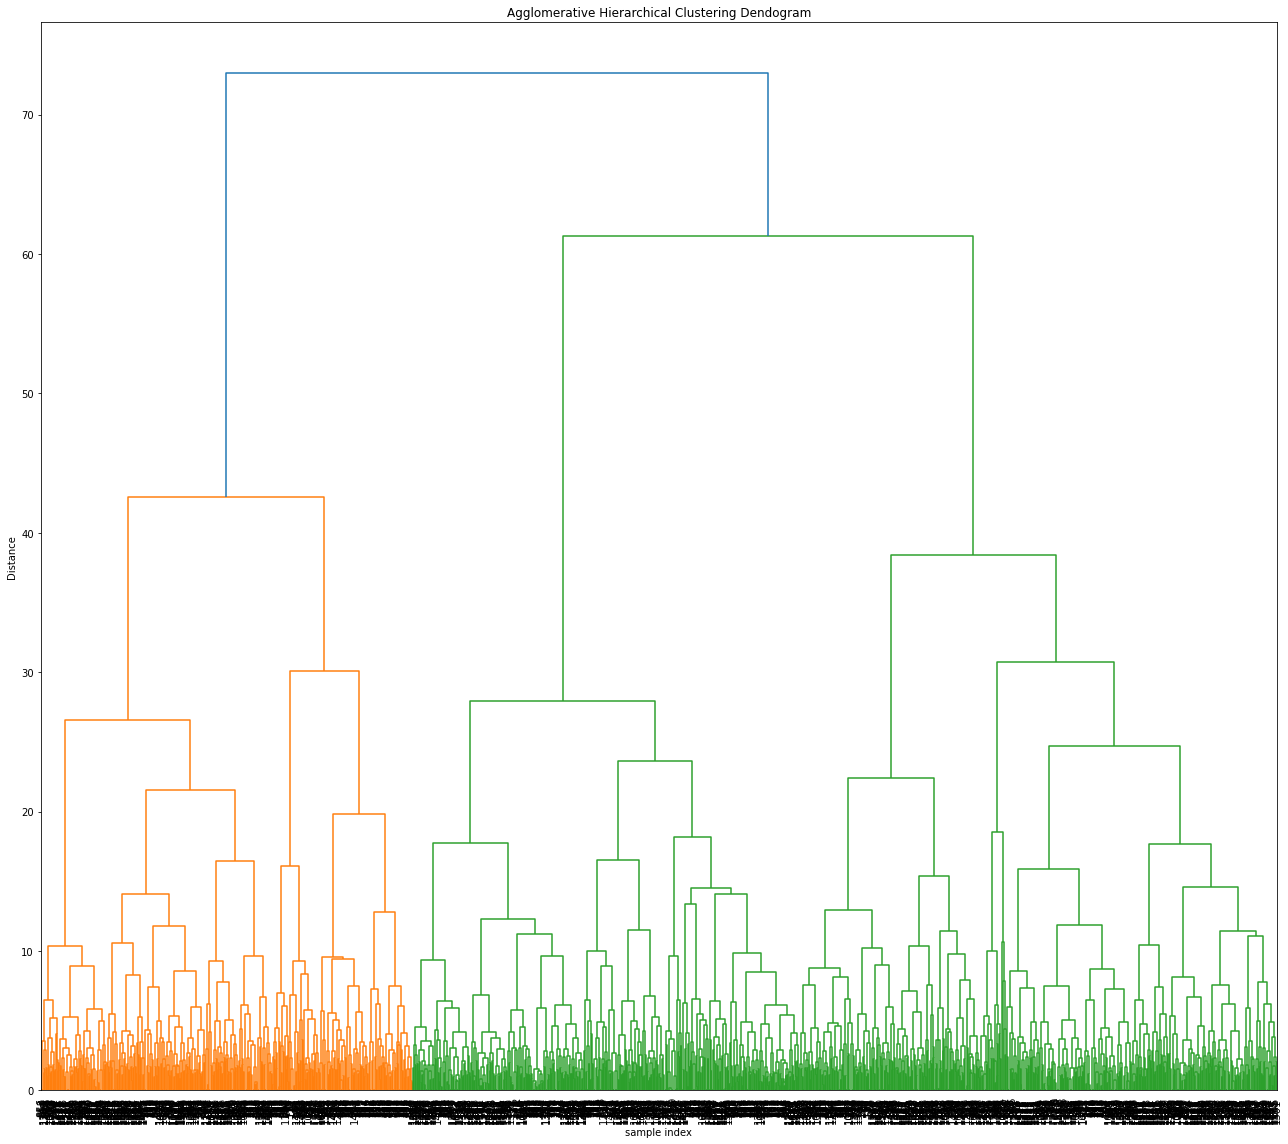

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=30,color_threshold=70,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

In [56]:
#Now we will consider the most important features (Volatile Acidity, Citric Acid and Alcohol)

In [57]:
df2 = df_scaled
df2 = df2[['volatile_acidity','citric_acid','alcohol']]

In [58]:
df2.head()

volatile_acidity  citric_acid   alcohol
0          0.995542    -1.531109 -1.075025
1          1.771299    -1.531109 -0.500860
2          1.269801    -1.255359 -0.500860
3         -1.550050     1.398471 -0.500860
4          0.995542    -1.531109 -1.075025

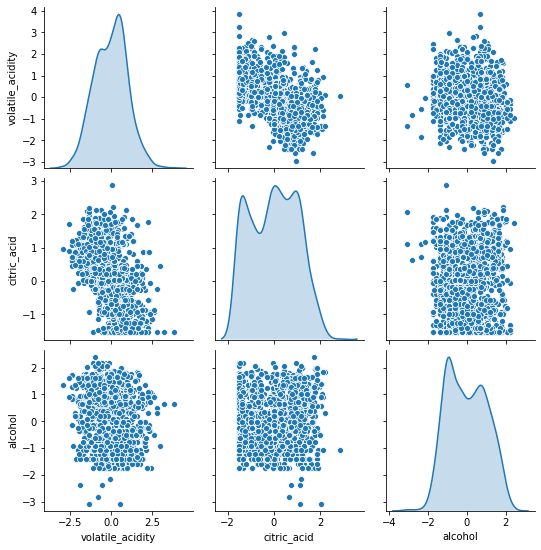

In [59]:
import seaborn as sns
sns.pairplot(df2,diag_kind='kde')

In [60]:
df_scaled=df2

In [61]:
df_scaled.head()

volatile_acidity  citric_acid   alcohol
0          0.995542    -1.531109 -1.075025
1          1.771299    -1.531109 -0.500860
2          1.269801    -1.255359 -0.500860
3         -1.550050     1.398471 -0.500860
4          0.995542    -1.531109 -1.075025

In [62]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters,n_init = 15, random_state=2)
  clusters.fit(df_scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

num_clusters  cluster_errors
0              1     4797.000000
1              2     2831.991006
2              3     2096.474987
3              4     1665.245171
4              5     1477.632179
5              6     1329.653494
6              7     1209.806055
7              8     1110.686420
8              9     1035.368373
9             10      968.220785
10            11      909.181153
11            12      857.967277
12            13      812.703372
13            14      771.277955

The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

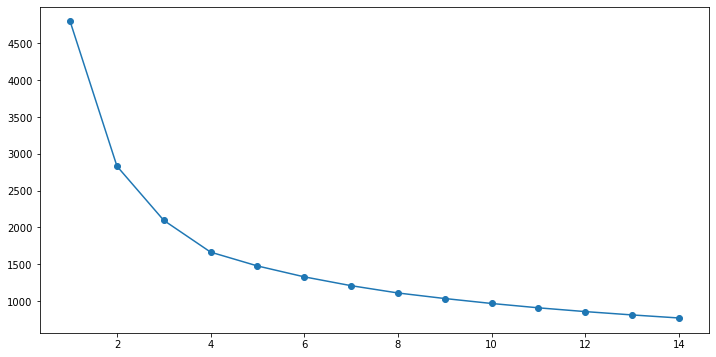

In [63]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [64]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)

In [65]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=2)

In [66]:
centroids=kmeans.cluster_centers_

In [67]:
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )

In [68]:
centroid_df

volatile_acidity  citric_acid   alcohol
0          0.817040    -1.012348  0.024132
1         -0.882912     0.849630  0.892960
2         -0.109485     0.386490 -0.946704

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [69]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [70]:
# Joining the label dataframe with the Wine data frame to create wine_df_labeled. Note: it could be appended to original dataframe
iris_df_labeled = df_scaled.join(df_labels)

In [71]:
iris_clusters = iris_df_labeled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])
df0=iris_clusters.get_group(0)
df1=iris_clusters.get_group(1)
df2=iris_clusters.get_group(2)
finaldf = pd.concat([df0,df1,df2])
finaldf.head()

volatile_acidity  citric_acid   alcohol labels
0          0.995542    -1.531109 -1.075025      0
1          1.771299    -1.531109 -0.500860      0
2          1.269801    -1.255359 -0.500860      0
4          0.995542    -1.531109 -1.075025      0
5          0.802929    -1.531109 -1.075025      0

In [72]:
c0=kmeans.cluster_centers_[0,:]
c1=kmeans.cluster_centers_[1,:]
c2=kmeans.cluster_centers_[2,:]

In [73]:
I0=0
I1=0
I2=0
for i in np.arange(df0.shape[0]):
  I0=I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
  I1=I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
  I2=I2+np.sum((df2.iloc[i,:-1]-c2)**2)

In [74]:
tot_I=I0+I1+I2
print(tot_I)

2096.4749865468098


In [75]:
kmeans.inertia_

2096.4749865468143

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.36588276336429365


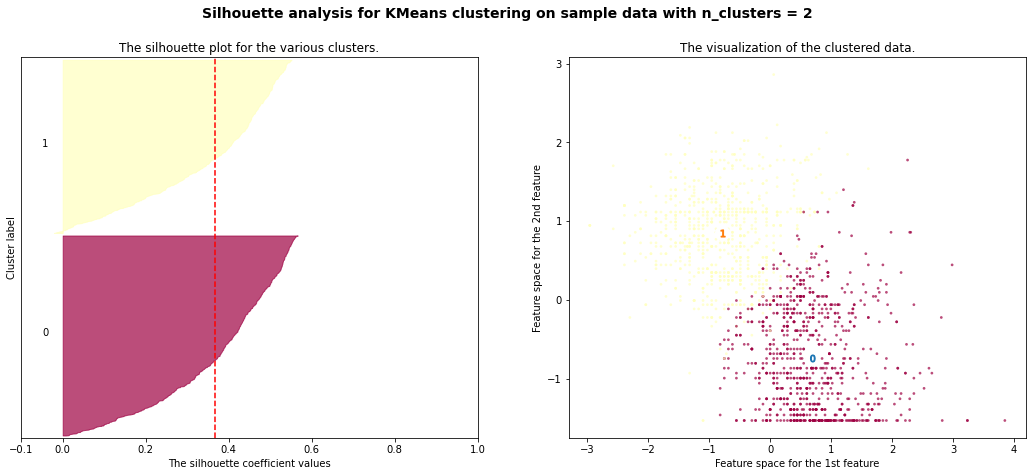

For n_clusters = 3 The average silhouette_score is : 0.3321472117610787


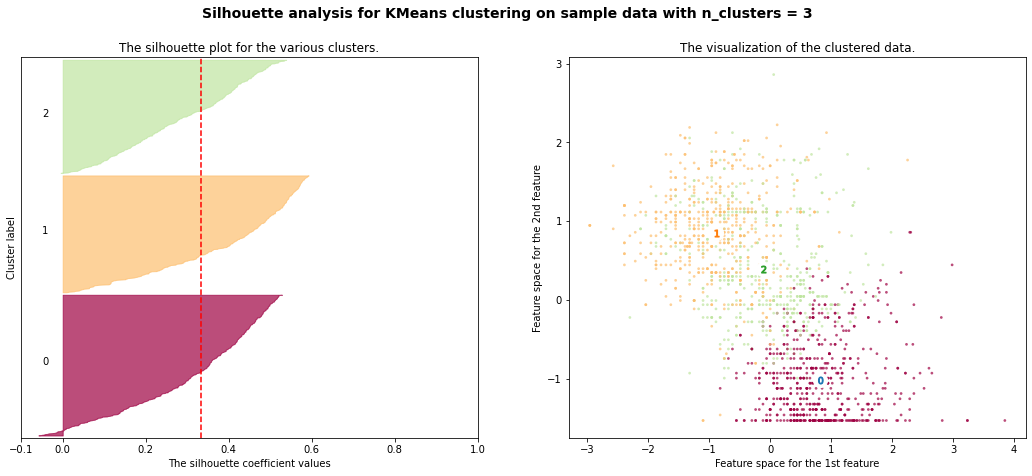

For n_clusters = 4 The average silhouette_score is : 0.3257409209758796


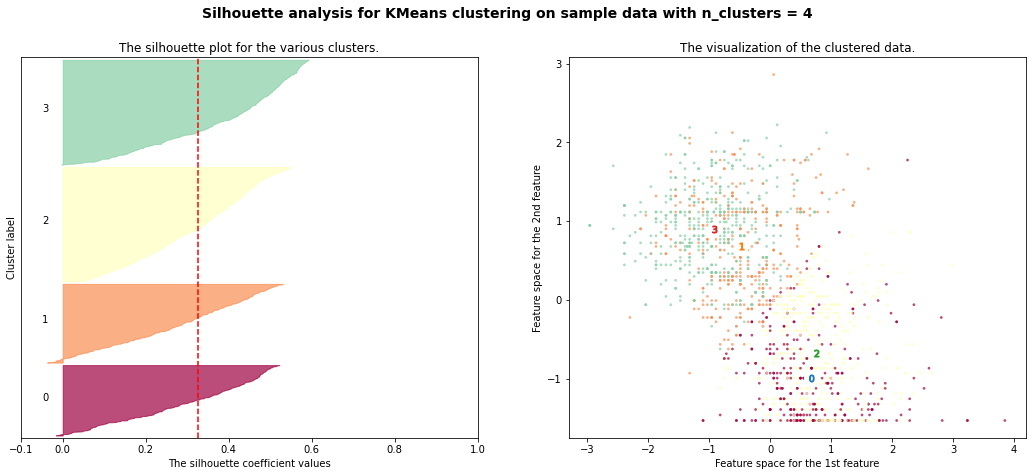

For n_clusters = 5 The average silhouette_score is : 0.3018581101660828


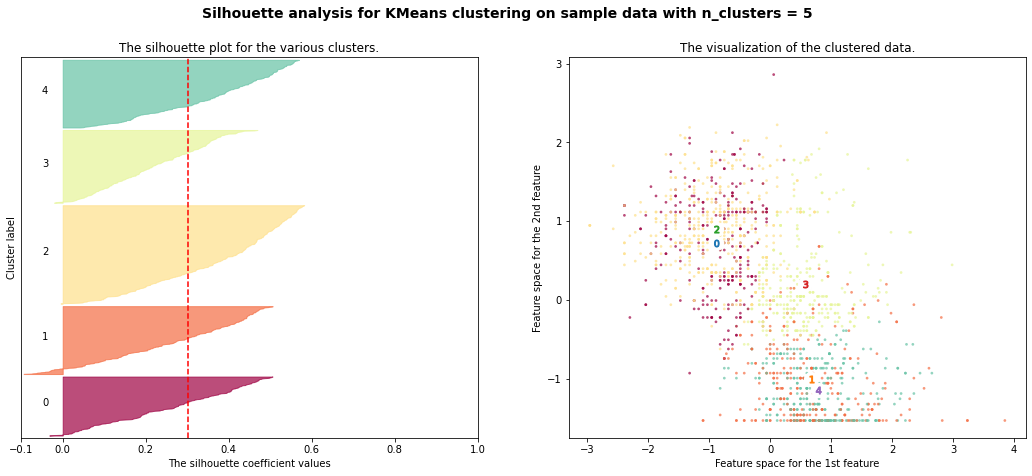

For n_clusters = 6 The average silhouette_score is : 0.2723553751554451


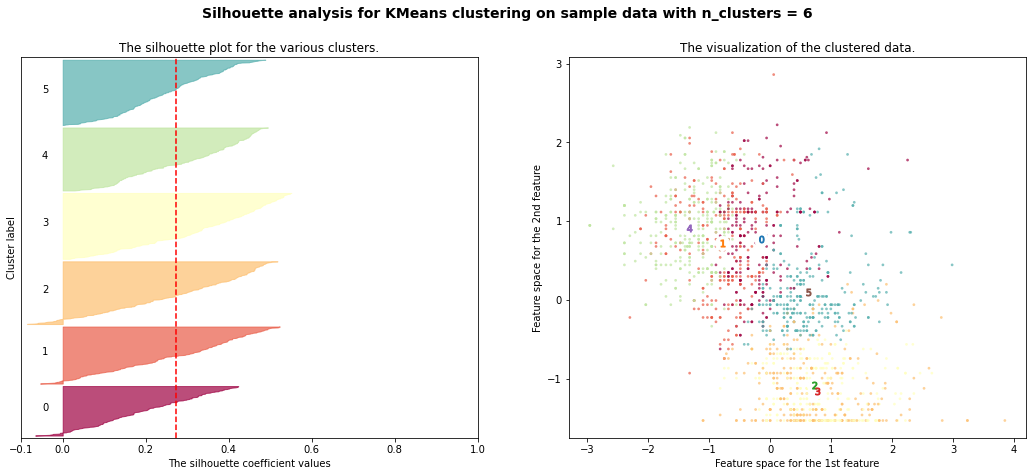

For n_clusters = 7 The average silhouette_score is : 0.272664243042482


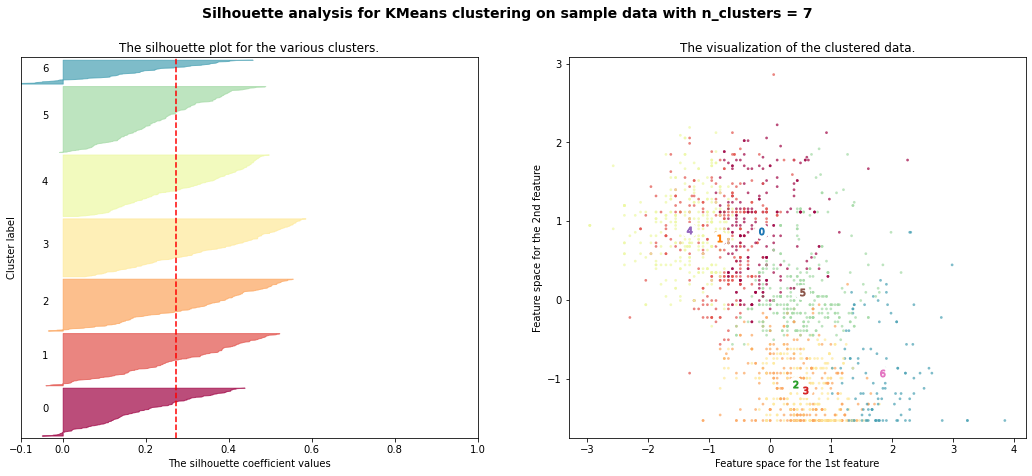

For n_clusters = 8 The average silhouette_score is : 0.27010500823854156


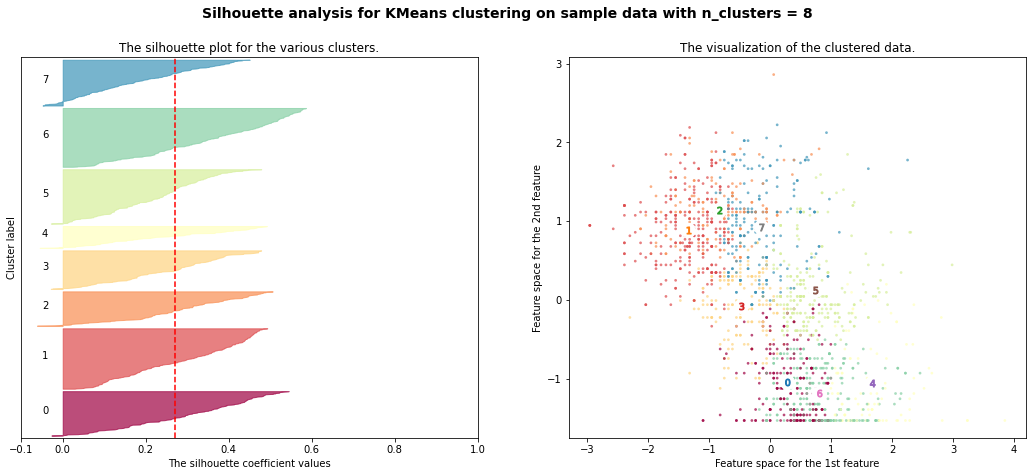

For n_clusters = 9 The average silhouette_score is : 0.26534400983927137


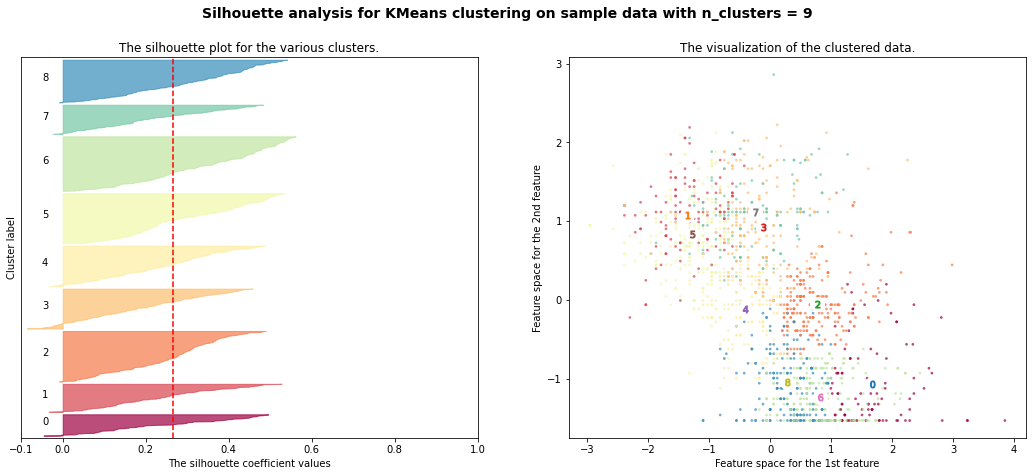

For n_clusters = 10 The average silhouette_score is : 0.2664571010384315


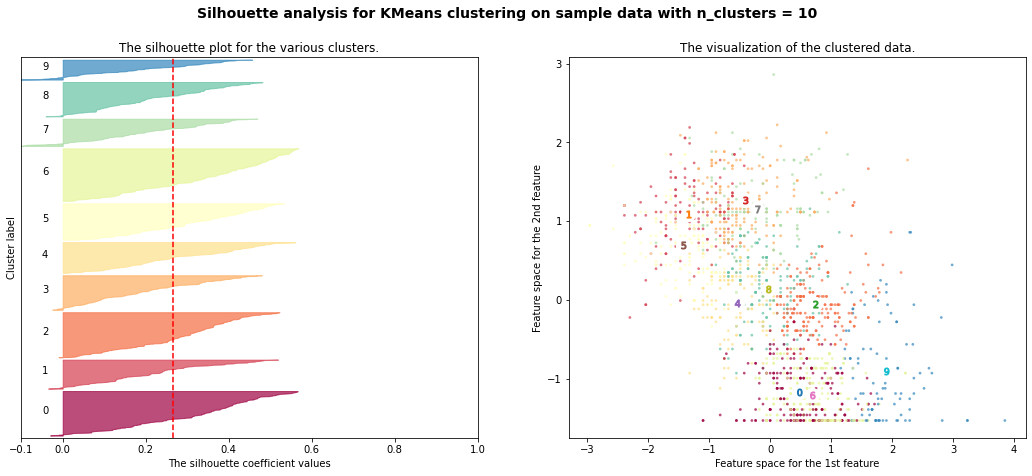

For n_clusters = 11 The average silhouette_score is : 0.2691457094481778


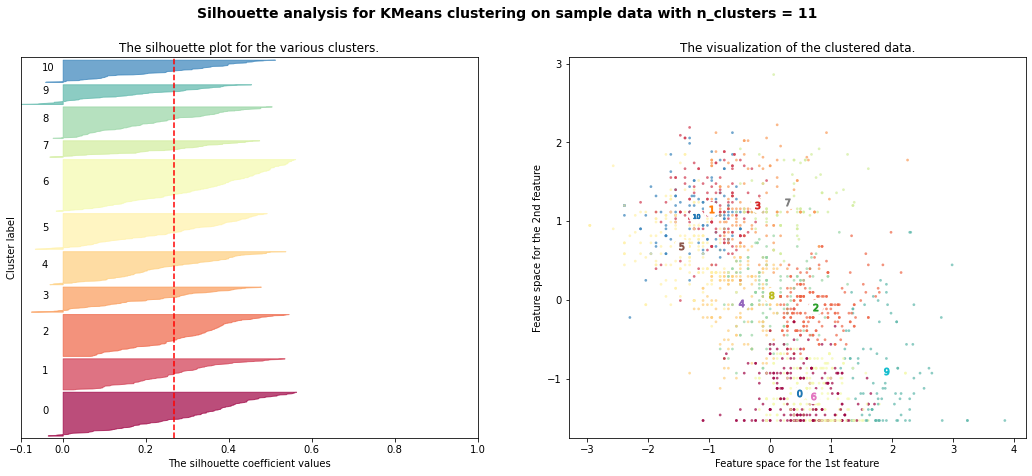

For n_clusters = 12 The average silhouette_score is : 0.2735869552399053


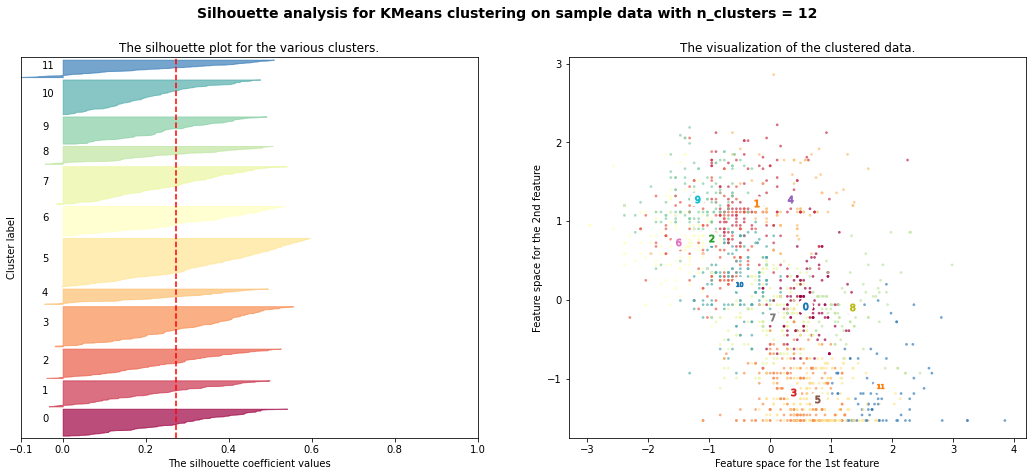

For n_clusters = 13 The average silhouette_score is : 0.2684715346238574


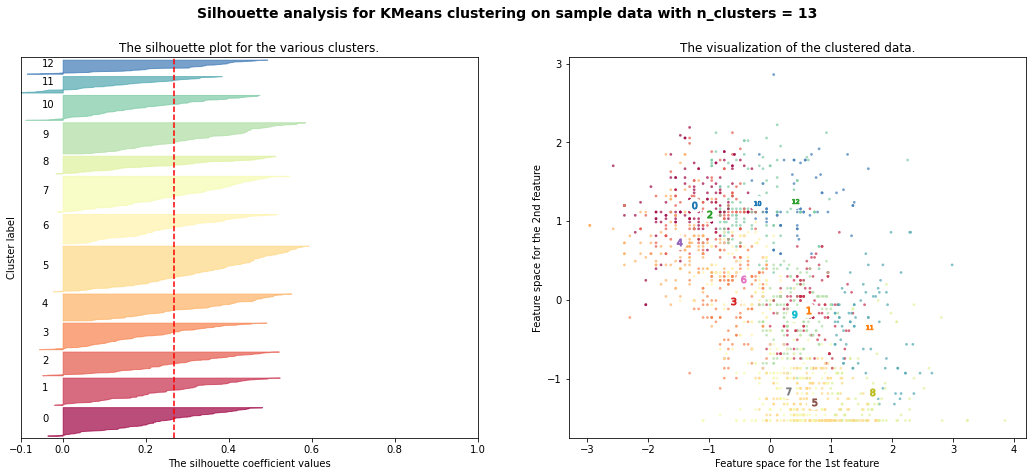

For n_clusters = 14 The average silhouette_score is : 0.26583907888228064


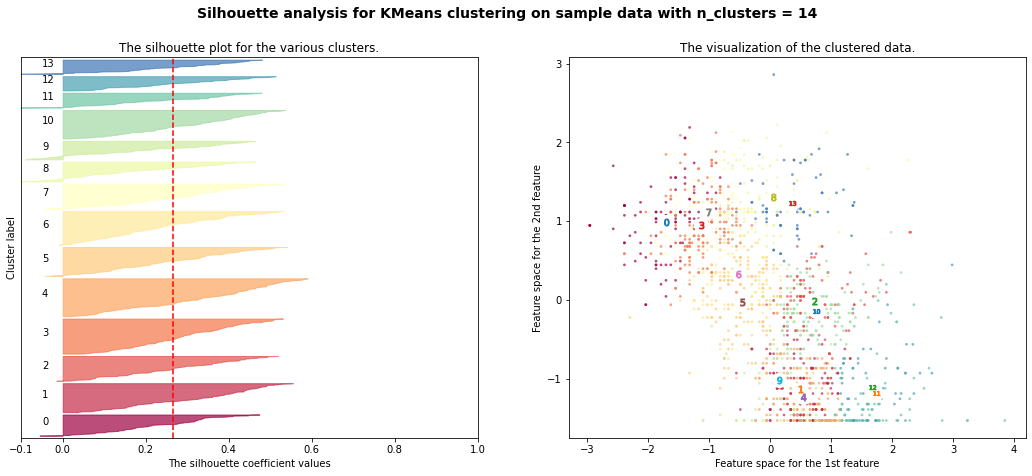

For n_clusters = 15 The average silhouette_score is : 0.26558897291866473


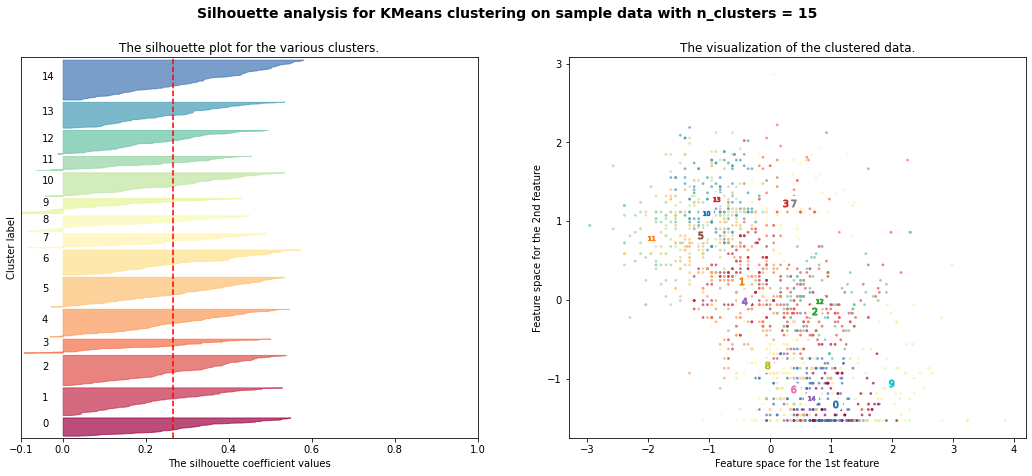

In [76]:
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=df_scaled.values

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,n_init=15, random_state=2)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

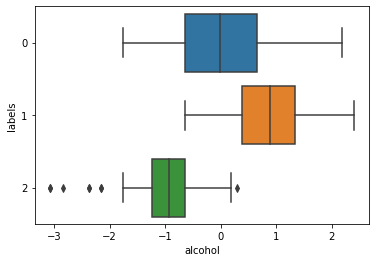

In [77]:
import seaborn as sns
sns.boxplot(x='alcohol', y = 'labels', data = finaldf)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9BBD4E148>,
      dtype=object)

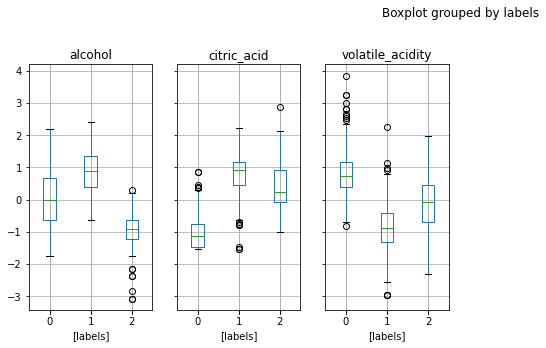

In [78]:
finaldf.boxplot(by = 'labels',  layout=(2,6), figsize=(15, 10))

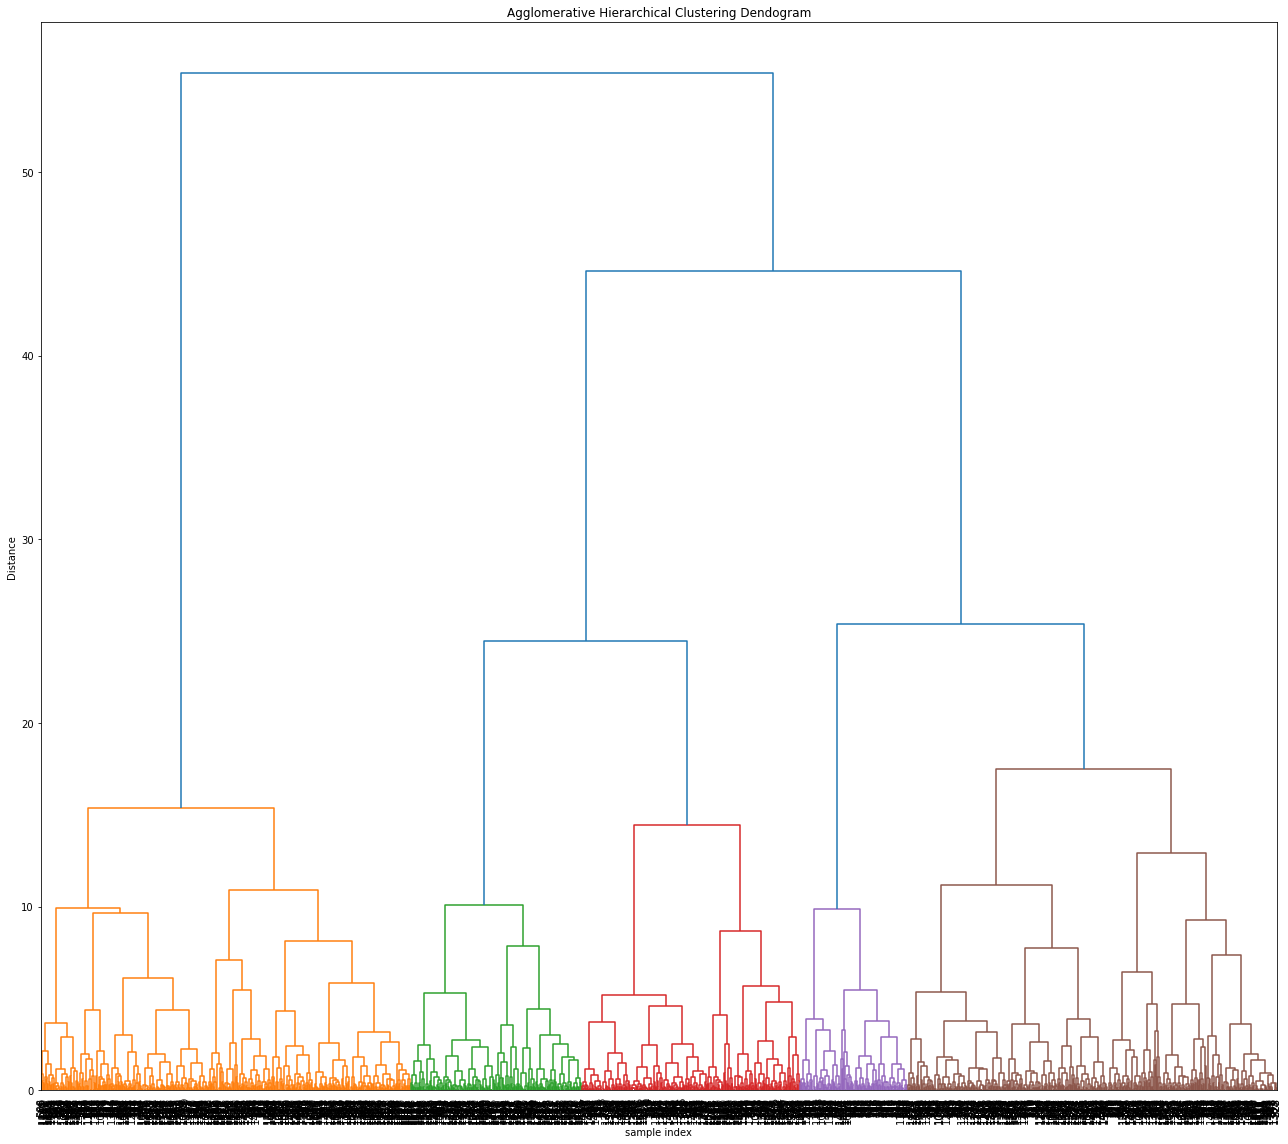

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(df_scaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=30,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()